## Author : Indumathi Pandiyan

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">**Project on Statistical NLP** (Module 1) submitted for PGP-AIML Great Learning on 02-July-2022

## Part A - 40 Marks

• **DOMAIN:** Digital content management

• **CONTEXT:** Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem

• **DATA DESCRIPTION:** Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 
19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or 
approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and 
the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is 
marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
• 8240 "10s" blogs (ages 13-17),
• 8086 "20s" blogs(ages 23-27) and
• 2994 "30s" blogs (ages 33-47)
• For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of 
common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the 
date of the following post and links within a post are denoted by the label url lin

**PROJECT OBJECTIVE:** To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case 
study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable

### Steps and tasks: [ Total Score: 40 Marks]

In [160]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [551]:
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec

In [552]:

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\indukishen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\indukishen\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\indukishen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1. Read and Analyse Dataset. [5 Marks]

### Load the contents of the zip File

In [553]:
from zipfile import ZipFile

with ZipFile('blogs.zip', 'r') as zipdata:
    data_csv = zipdata.open('blogtext.csv')

### Set the csv to local dataframe

In [554]:
# First Reading csv File
blog_text=pd.read_csv(data_csv)

In [555]:

blog_text.head(10)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


In [556]:
blog_text.head(3).T

,0,1,2
id,2059027,2059027,2059027
gender,male,male,male
age,15,15,15
topic,Student,Student,Student
sign,Leo,Leo,Leo
date,"14,May,2004","13,May,2004","12,May,2004"
text,"Info has been found (+/- 100 pages,...",These are the team members: Drewe...,In het kader van kernfusie op aarde...


### Delete the csv to free memory

In [557]:
del data_csv

In [558]:
##

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A. Clearly write outcome of data analysis(Minimum 2 points) [2 Marks]

## Data Analysis

### Get the names of columns

In [559]:
blog_text.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [560]:
blog_text.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [561]:
blog_text['text'][2]

"           In het kader van kernfusie op aarde:  MAAK JE EIGEN WATERSTOFBOM   How to build an H-Bomb From: ascott@tartarus.uwa.edu.au (Andrew Scott) Newsgroups: rec.humor Subject: How To Build An H-Bomb (humorous!) Date: 7 Feb 1994 07:41:14 GMT Organization: The University of Western Australia  Original file dated 12th November 1990. Seemed to be a transcript of a 'Seven Days' article. Poorly formatted and corrupted. I have added the text between 'examine under a microscope' and 'malleable, like gold,' as it was missing. If anyone has the full text, please distribute. I am not responsible for the accuracy of this information. Converted to HTML by Dionisio@InfiNet.com 11/13/98. (Did a little spell-checking and some minor edits too.) Stolen from  urlLink http://my.ohio.voyager.net/~dionisio/fun/m...own-h-bomb.html  and reformatted the HTML. It now validates to XHTML 1.0 Strict. How to Build an H-Bomb Making and owning an H-bomb is the kind of challenge real Americans seek. Who wants to 

In [562]:
blog_text['text'][4]

"             Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate instructions like: 'go to the site, click on the pop-audio button then choose...'.  So, without further ado here is the link to 24-hour K-Pop  urlLink audio  and the  urlLink video  streaming.  Enjoy.         "

In [563]:
blog_text['topic'][4]

'InvestmentBanking'

In [564]:
blog_text['topic'].unique()

array(['Student', 'InvestmentBanking', 'indUnk', 'Non-Profit', 'Banking',
       'Education', 'Engineering', 'Science', 'Communications-Media',
       'BusinessServices', 'Sports-Recreation', 'Arts', 'Internet',
       'Museums-Libraries', 'Accounting', 'Technology', 'Law',
       'Consulting', 'Automotive', 'Religion', 'Fashion', 'Publishing',
       'Marketing', 'LawEnforcement-Security', 'HumanResources',
       'Telecommunications', 'Military', 'Government', 'Transportation',
       'Architecture', 'Advertising', 'Agriculture', 'Biotech',
       'RealEstate', 'Manufacturing', 'Construction', 'Chemicals',
       'Maritime', 'Tourism', 'Environment'], dtype=object)

In [565]:
blog_text['topic'].nunique()

40

In [566]:
blog_text.shape

(681284, 7)

In [567]:
blog_text.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [568]:
blog_text.tail(5)

,id,gender,age,topic,sign,date,text
681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."
681283,1713845,male,23,Student,Taurus,"01,July,2004","Hey everybody...and Susan, You might a..."


In [569]:
blog_text.shape

(681284, 7)

In [570]:
blog_text['gender'].nunique()

2

In [571]:
blog_text['gender'].value_counts()

male      345193
female    336091
Name: gender, dtype: int64

In [572]:
blog_text['age'].nunique()

26

In [573]:
blog_text['age'].value_counts()

17    80859
24    80071
23    72889
16    72708
25    67051
26    55312
27    46124
15    41767
14    27400
34    21347
33    17584
35    17462
36    14229
13    13133
37     9317
38     7545
39     5556
40     5016
45     4482
43     4230
41     3738
48     3572
42     2908
46     2733
47     2207
44     2044
Name: age, dtype: int64

In [574]:
blog_text['topic'].value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

In [575]:
blog_text['topic'].value_counts(normalize=True)*100

indUnk                     36.844400
Student                    22.590139
Technology                  6.172903
Arts                        4.762918
Education                   4.349581
Communications-Media        2.956183
Internet                    2.349387
Non-Profit                  2.157690
Engineering                 1.710447
Law                         1.326906
Publishing                  1.137998
Science                     1.066956
Government                  1.013821
Consulting                  0.860434
Religion                    0.768402
Fashion                     0.712038
Marketing                   0.700002
Advertising                 0.686351
BusinessServices            0.660517
Banking                     0.594319
Chemicals                   0.576558
Telecommunications          0.571127
Accounting                  0.562467
Military                    0.459133
Museums-Libraries           0.454436
Sports-Recreation           0.445923
HumanResources              0.441813
R

**Inference** :The data is parsed and few topic has less than 0.1 percentage of total dataset. Hence logically to make it balanced 
based on distribution topics are combined in below code.

In [576]:
blog_text_df=blog_text.copy()

In [577]:
blog_text_df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [578]:
#'Education','Accounting': 'Education,Accounting'}
blog_text_df.replace({'topic': 
             {'Arts':'Arts and Science',
             'Education':'Accounting and Education',
             'Communications-Media':'Internet, communication media and Humar Resources',
             'Internet':'Internet, communication media and Humar Resources',
             'Non-Profit':'Fashion, religion and Non-Profit',
             'Engineering':'Engineering and Telecommunications',
             'Law':'Government,Law and military',
             'Publishing':'Consulting,Marketing,Publishing,Advertising',
             'Science':'Arts and Science',
             'Government':'Government,Law and military',
             'Consulting':'Consulting,Marketing,Publishing,Advertising',
             'Religion':'Fashion, religion and Non-Profit',
             'Fashion':'Fashion, religion and Non-Profit',
            'Marketing':'Consulting,Marketing,Publishing,Advertising',
            'Advertising':'Consulting,Marketing,Publishing,Advertising',
            'BusinessServices':'Banking,InvestmentBanking,BusinessServices',
            'Banking':'Banking,InvestmentBanking,BusinessServices',
            'Chemicals':'Chemicals,Manufacturing',
            'Telecommunications':'Engineering and Telecommunications',
            'Accounting':'Accounting and Education',
            'Military':'Government,Law and military',
            'Museums-Libraries':'Museums-Libraries,Sports-Recreation,Tourism',
            'Sports-Recreation':'Museums-Libraries,Sports-Recreation,Tourism',
            'HumanResources':'Internet, communication media and Humar Resources',
            'RealEstate':'Architecture,Construction,RealEstate',
            'Transportation':'Automotive,Transportation',
            'Manufacturing':'Chemicals,Manufacturing',
            'Biotech':'Agriculture, Biotech,Environment',
            'Tourism':'Museums-Libraries,Sports-Recreation,Tourism',
            'LawEnforcement-Security':'Government,Law and military',
            'Architecture':'Architecture,Construction,RealEstate',
            'InvestmentBanking':'Banking,InvestmentBanking,BusinessServices',
            'Automotive':'Automotive,Transportation',
            'Agriculture':'Agriculture, Biotech,Environment',
            'Construction':'Architecture,Construction,RealEstate',
            'Environment':'Agriculture, Biotech,Environment',
            'Maritime':'Agriculture, Biotech,Environment',}}, 
            inplace= True)


In [579]:
blog_text_df['topic'].value_counts(normalize=True)

indUnk                                               0.368444
Student                                              0.225901
Technology                                           0.061729
Arts and Science                                     0.058299
Internet, communication media and Humar Resources    0.057474
Accounting and Education                             0.049120
Fashion, religion and Non-Profit                     0.036381
Consulting,Marketing,Publishing,Advertising          0.033848
Government,Law and military                          0.030755
Engineering and Telecommunications                   0.022816
Banking,InvestmentBanking,BusinessServices           0.014445
Museums-Libraries,Sports-Recreation,Tourism          0.011854
Chemicals,Manufacturing                              0.009100
Architecture,Construction,RealEstate                 0.008221
Agriculture, Biotech,Environment                     0.006372
Automotive,Transportation                            0.005240
Name: to

The data having 36% of IndUnk and 22% student. Rest of the other topics cover nearly 32%. But We have grouped together relavant topic to be useful for model building.

In [580]:
blog_text = blog_text_df.copy()

In [581]:
blog_text['topic'].nunique()

16

In [582]:
pd.DataFrame(blog_text.topic.unique()).values

array([['Student'],
       ['Banking,InvestmentBanking,BusinessServices'],
       ['indUnk'],
       ['Fashion, religion and Non-Profit'],
       ['Accounting and Education'],
       ['Engineering and Telecommunications'],
       ['Arts and Science'],
       ['Internet, communication media and Humar Resources'],
       ['Museums-Libraries,Sports-Recreation,Tourism'],
       ['Technology'],
       ['Government,Law and military'],
       ['Consulting,Marketing,Publishing,Advertising'],
       ['Automotive,Transportation'],
       ['Architecture,Construction,RealEstate'],
       ['Agriculture, Biotech,Environment'],
       ['Chemicals,Manufacturing']], dtype=object)

In [583]:
blog_text['sign'].nunique()

12

In [584]:
blog_text['sign'].value_counts()

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64

In [585]:
blog_text['id'].nunique()

19320

### Outcome of Data Analysis : 

* The dataset has 681284 records with 7 features. 
* The features are 'id', 'gender', 'age', 'topic', 'sign', 'date', 'text'
* 50% belongs to male gender and 50% belongs to female
* There are totally 40 topics available that would be the target variable for this multilabel classification problem
* Text contains the blog entry from different authors of various age,sign and topic


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">B. Clean the Structured Data [3 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">i. Missing value analysis and imputation. [1 Marks]

In [586]:
blog_text.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [587]:
percent_missing = blog_text.isnull().sum() * 100 / len(blog_text)
missing_value_data = pd.DataFrame({'Feature Name': blog_text.columns,
                                 'percent_missing': percent_missing})
print(missing_value_data)

       Feature Name  percent_missing
id               id              0.0
gender       gender              0.0
age             age              0.0
topic         topic              0.0
sign           sign              0.0
date           date              0.0
text           text              0.0


**Note:** There is no missing values observed

Now, for our multi-class text classification task, we will be using only two of these columns out of 7, that is the column with the name ‘Topic’ and the column ‘Text'. Now let us create a new DataFrame to store only these two columns.

In [588]:
blog_text.shape

(681284, 7)

In [589]:
# Create a new dataframe with two columns
blog_df = blog_text[['topic', 'text']].copy()

In [590]:
blog_df['topic_id'] = blog_df['topic'].factorize()[0]

In [595]:
blog_id_df = blog_df[['topic', 'topic_id']].drop_duplicates()

In [596]:
blog_id_df.shape

(16, 2)

In [597]:
blog_id_df

,topic,topic_id
0,Student,0
4,"Banking,InvestmentBanking,BusinessServices",1
74,indUnk,2
133,"Fashion, religion and Non-Profit",3
474,Accounting and Education,4
573,Engineering and Telecommunications,5
692,Arts and Science,6
732,"Internet, communication media and Humar Resources",7
851,"Museums-Libraries,Sports-Recreation,Tourism",8
1393,Technology,9


In [598]:
blog_df['topic'].value_counts()

indUnk                                               251015
Student                                              153903
Technology                                            42055
Arts and Science                                      39718
Internet, communication media and Humar Resources     39156
Accounting and Education                              33465
Fashion, religion and Non-Profit                      24786
Consulting,Marketing,Publishing,Advertising           23060
Government,Law and military                           20953
Engineering and Telecommunications                    15544
Banking,InvestmentBanking,BusinessServices             9841
Museums-Libraries,Sports-Recreation,Tourism            8076
Chemicals,Manufacturing                                6200
Architecture,Construction,RealEstate                   5601
Agriculture, Biotech,Environment                       4341
Automotive,Transportation                              3570
Name: topic, dtype: int64

Environment. maritime are having very less values which would not help in predicting. Let us verify later if any of the columns can be combined

In [200]:
blog_df.shape


(681284, 3)

In [201]:
### To find imbalance in Data

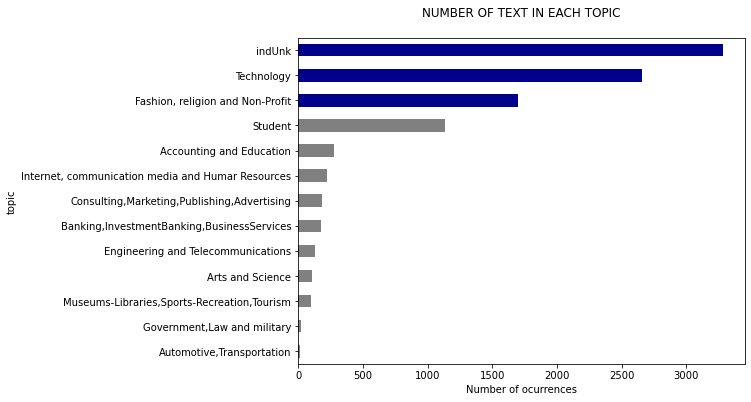

In [754]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue']
blog_df.groupby('topic').text.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF TEXT IN EACH TOPIC\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [600]:
# Dictionaries for future use
topic_to_id = dict(blog_id_df.values)
id_to_topic = dict(blog_id_df[['topic_id', 'topic']].values)
# New dataframe
blog_id_df

,topic,topic_id
0,Student,0
4,"Banking,InvestmentBanking,BusinessServices",1
74,indUnk,2
133,"Fashion, religion and Non-Profit",3
474,Accounting and Education,4
573,Engineering and Telecommunications,5
692,Arts and Science,6
732,"Internet, communication media and Humar Resources",7
851,"Museums-Libraries,Sports-Recreation,Tourism",8
1393,Technology,9


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">ii. Eliminate Non-English textual data. [2 Marks]

In [474]:
### for easy processing first taking first 30000 records

In [601]:
blog_df1=blog_df.copy()

In [602]:
blog_df = blog_df.head(10000)

In [603]:
blog_df_temp=blog_df.copy()



Hint: Refer ‘langdetect’ library to detect language of the input text)

In [604]:
!pip install langdetect

Defaulting to user installation because normal site-packages is not writeable


In [605]:
from langdetect import detect

In [606]:
def detect_lang(text):
    return detect(text)

In [607]:
sample_text=blog_df['text'][4]

In [608]:
detect(sample_text)

'en'

## Method to detect language of the Text

In [609]:
def detect_en(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [610]:
blog_text_new= blog_df[blog_df['text'].apply(detect_en)]

In [611]:
blog_text_new.shape

(9551, 3)

In [612]:
blog_text_temp_1=blog_text_new.copy()

In [613]:
blog_df_final=blog_text_temp_1.copy()

In [651]:
blog_df_final.shape

(9551, 3)

In [652]:
blog_df_final['topic_id'].nunique()

13

### out of 10000 records taken for sampling only 9551 records belong to english language

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2. Preprocess unstructured data to make it consumable for model training. [5 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A. Eliminate All special Characters and Numbers [2 Marks]

In [615]:
import re
sample=blog_df_final['text'][4]

In [616]:
sample

"             Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate instructions like: 'go to the site, click on the pop-audio button then choose...'.  So, without further ado here is the link to 24-hour K-Pop  urlLink audio  and the  urlLink video  streaming.  Enjoy.         "

In [617]:
new_sample = re.sub('[^A-Za-z]+', ' ', sample)


In [618]:
print(new_sample)

 Thanks to Yahoo s Toolbar I can now capture the URLs of popups which means now I can show you some cool links to Korean Pop K Pop audio and video without the need to relate instructions like go to the site click on the pop audio button then choose So without further ado here is the link to hour K Pop urlLink audio and the urlLink video streaming Enjoy 


In [619]:
# Select only alphabets
import re
blog_df_final['text']=blog_df_final['text'].apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">B. Lowercase all textual data [1 Marks]

In [620]:
blog_df_final['text']=blog_df_final['text'].apply(lambda x: x.lower())

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">C. Remove all Stopwords [1 Marks]

In [621]:
# Remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
blog_df_final['text']=blog_df_final['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">D. Remove all extra white spaces [1 Marks]

In [622]:
# Strip unwanted spaces
blog_df_final['text']=blog_df_final['text'].apply(lambda x: x.strip())

In [623]:
blog_df_final['text'][4]

'thanks yahoo toolbar capture urls popups means show cool links korean pop k pop audio video without need relate instructions like go site click pop audio button choose without ado link hour k pop urllink audio urllink video streaming enjoy'

In [498]:
blog_df_final['text'][6]

'somehow coca cola way summing things well early flagship jingle like buy world coke tune like teach world sing pretty much summed post woodstock era well add much sales catchy tune korea coke theme urllink stop thinking feel pretty much sums lot korea koreans look relaxed couple stopped thinking started feeling course high regard education math logic deep think many koreans really like work emotion anything else westerners seem sublimate moreso least display different way maybe scratch westerners koreans probably pretty similar context different anyways think losing korea repeat stop thinking feel stop thinking feel stop thinking feel everything alright'

### Remove punctuation

In [626]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [627]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
blog_df_final['text']=blog_df_final['text'].apply(lambda x:remove_punctuation(x))


In [628]:
blog_df_final.tail()

,topic,text,topic_id
9995,indUnk,take home forever may rest sleep arms forgotte...,2
9996,indUnk,seductive secretness behind doors warning neve...,2
9997,indUnk,kind need holding hand petting hair cry bring ...,2
9998,indUnk,blurry outside sounds people mingle pass darkn...,2
9999,indUnk,body feels broken mind rejoices thought warmth...,2


### Lemmatization

In [629]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [630]:
nrows = len(blog_df_final)

In [631]:
nrows

9551

In [632]:
blog_df_final.loc[149]['text']

'nbsp yeah thinking bit nbsp typing nbsp n'

In [633]:
blog_df_final.loc[140]['text']

'incident yesterday girl talking messenger clicked accept webcam feed realising actually wearing top modesty fun saved uncompromising norton pop increasingly answer ah well rain insistent unwelcome mention inappropriate time year good weather following hot chocolate writing songs staying inside shaving okay shaving need also washing pants go mystery blog unfolds sure master plans plural master plan would complete without least one foolproof contingency become clear must go busy ongoing preliminary stages maybe biscuit watch tv hugs themadnesshamster follow n'

In [634]:
blog_df_final.loc[151]['text']

'nbsp wondering whether inclusion links stuff would enhance detract blog one problems old journal people started getting clever clever original double edged sword given choice popular jumping point obscure idiosyncratic choose latter always mind say combine two direct urllink greg nbsp good example hat tipping guy got started nbsp'

In [636]:
#for index, row in blog_df_final.iterrows():
   # print("***************")
    #print(row['text'])

In [637]:
i=0
for col in blog_df_final[['text']]:
    if(i<1):
        print(blog_df_final[col])
        i=i+1
        print(i)

0       info found pages mb pdf files wait untill team...
2       het kader van kernfusie op aarde maak je eigen...
3                                         testing testing
4       thanks yahoo toolbar capture urls popups means...
5       interesting conversation dad morning talking k...
                              ...                        
9995    take home forever may rest sleep arms forgotte...
9996    seductive secretness behind doors warning neve...
9997    kind need holding hand petting hair cry bring ...
9998    blurry outside sounds people mingle pass darkn...
9999    body feels broken mind rejoices thought warmth...
Name: text, Length: 9551, dtype: object
1


In [638]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\indukishen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [639]:

lemmatized_text_list = []

for index, row in blog_df_final.iterrows():
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = row['text']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [640]:
blog_df_final['fin_text'] = lemmatized_text_list

In [642]:
blog_df_final.tail(10)

,topic,text,topic_id,fin_text
9990,indUnk,colourful displays affection beaming happiness...,2,colourful display affection beam happiness smi...
9991,indUnk,want hide away tonight climb darkness warmth b...,2,want hide away tonight climb darkness warmth b...
9992,indUnk,smile takes away worry strong hands cup hold g...,2,smile take away worry strong hand cup hold gen...
9993,indUnk,pulling leash urgency face close smell scent e...,2,pull leash urgency face close smell scent ever...
9994,indUnk,beyond call gods heroes beyond taste salt lips...,2,beyond call gods heroes beyond taste salt lips...
9995,indUnk,take home forever may rest sleep arms forgotte...,2,take home forever may rest sleep arm forget ca...
9996,indUnk,seductive secretness behind doors warning neve...,2,seductive secretness behind doors warn never l...
9997,indUnk,kind need holding hand petting hair cry bring ...,2,kind need hold hand pet hair cry bring water c...
9998,indUnk,blurry outside sounds people mingle pass darkn...,2,blurry outside sound people mingle pass darkne...
9999,indUnk,body feels broken mind rejoices thought warmth...,2,body feel break mind rejoice think warmth smil...


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. Build a base Classification model [8 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A. Create dependent and independent variables [2 Marks]

In [643]:
blog_df_final.head()

,topic,text,topic_id,fin_text
0,Student,info found pages mb pdf files wait untill team...,0,info find page mb pdf file wait untill team le...
2,Student,het kader van kernfusie op aarde maak je eigen...,0,het kader van kernfusie op aarde maak je eigen...
3,Student,testing testing,0,test test
4,"Banking,InvestmentBanking,BusinessServices",thanks yahoo toolbar capture urls popups means...,1,thank yahoo toolbar capture urls popups mean s...
5,"Banking,InvestmentBanking,BusinessServices",interesting conversation dad morning talking k...,1,interest conversation dad morning talk koreans...


**Observation:** After lemmetization the fin_text contains the lemmetized wordks. Found become fine, thanks become thank, interesting become interest

In [644]:
blog_df_final.drop(columns =['text'],axis=1,inplace = True)

In [645]:
blog_df_final.shape

(9551, 3)

In [646]:
blog_df_final.head()

,topic,topic_id,fin_text
0,Student,0,info find page mb pdf file wait untill team le...
2,Student,0,het kader van kernfusie op aarde maak je eigen...
3,Student,0,test test
4,"Banking,InvestmentBanking,BusinessServices",1,thank yahoo toolbar capture urls popups mean s...
5,"Banking,InvestmentBanking,BusinessServices",1,interest conversation dad morning talk koreans...


In [647]:
X = blog_df_final.fin_text
y = blog_df_final.topic_id

In [648]:
X.head()

0    info find page mb pdf file wait untill team le...
2    het kader van kernfusie op aarde maak je eigen...
3                                            test test
4    thank yahoo toolbar capture urls popups mean s...
5    interest conversation dad morning talk koreans...
Name: fin_text, dtype: object

In [649]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [650]:
len(y.unique())

13

### text is the independent variable X and Topic is dependent variable


Hint: Treat ‘topic’ as a Target variable.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">B. Split data into train and test. [1 Marks]

In [653]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=blog_df_final['topic_id'], test_size=0.20, random_state=42)

In [654]:
X_train.shape

(7640,)

In [655]:
X_train.head()

5067    beyond want beyond fear fear terrify many ques...
3926    well vote amien rais siswono morning election ...
9386    hey hey hey bio midterm easy probably b take p...
225     deer eye dart ears perk shuffle sound dead lea...
2806                                    help red put test
Name: fin_text, dtype: object

In [656]:
X_test.shape

(1911,)

In [657]:
y_train.shape

(7640,)

In [658]:
y_train.head()

5067    2
3926    2
9386    2
225     0
2806    9
Name: topic_id, dtype: int64

In [659]:
y_test.shape

(1911,)

In [660]:
y_test.unique()

array([ 9,  3,  2,  4,  0,  8,  5, 11,  6,  7,  1, 12, 10], dtype=int64)

In [661]:
sorted(y_train.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [662]:
sorted(y_test.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [663]:
len(y_train.unique())

13

In [664]:
len(y_test.unique())

13

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">C. Vectorize data using any one vectorizer. [2 Marks]

In [666]:

# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_train_count = cv.fit_transform(X_train)
x_test_count = cv.transform(X_test)
print(x_train_count.shape)
print(x_test_count.shape)

(7640, 2500)
(1911, 2500)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">D. Build a base model for Supervised Learning - Classification. [2 Marks]

In [667]:
from sklearn.naive_bayes import MultinomialNB

In [668]:
# Classifier - Algorithm - Naive Bayes
# fit the training dataset on the classifier
mb_classifier =MultinomialNB().fit(x_train_count,y_train)

# predict the labels on validation dataset
predictions_NB_count = mb_classifier.predict(x_test_count)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB_count, y_test)*100)

Naive Bayes Accuracy Score ->  57.195185766614344


In [669]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, predictions_NB_count)

In [670]:
labels=y_test.unique()

In [671]:
labels

array([ 9,  3,  2,  4,  0,  8,  5, 11,  6,  7,  1, 12, 10], dtype=int64)

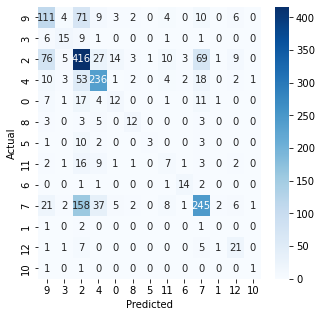

In [672]:
cm = confusion_matrix(y_test, predictions_NB_count)
#labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sns.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [673]:
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix. 
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">E. Clearly print Performance Metrics. [1 Marks]

CPU times: total: 0 ns
Wall time: 0 ns
Accuracy:  0.6096284667713239


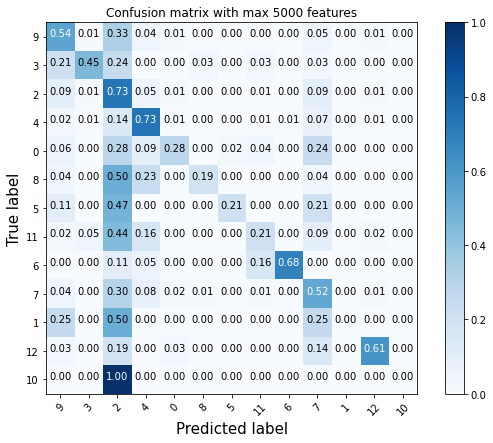

In [674]:
vect = CountVectorizer(max_features=5000) # Step-1
X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=True,
                      title='Confusion matrix with max 5000 features')

In [ ]:
Observations: 
    Increasing the featurs have better results

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">
4. Improve Performance of model. [14 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A. Experiment with other vectorisers. [4 Marks]

In [676]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(blog_df_final['fin_text'])

Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [677]:
from sklearn.naive_bayes import MultinomialNB

In [678]:

# Classifier - Algorithm - Naive Bayes
# fit the training dataset on the classifier
mb_classifier =MultinomialNB().fit(Train_X_Tfidf,y_train)

# predict the labels on validation dataset
predictions_NB = mb_classifier.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  55.25902668759811


In [679]:
# Ignore warnings
import warnings

warnings.filterwarnings("ignore")

In [680]:
# Classification report
print("Classification report")
print(classification_report(y_test,predictions_NB))

Classification report
              precision    recall  f1-score   support

           0       0.90      0.12      0.21       220
           1       0.00      0.00      0.00        33
           2       0.45      0.94      0.60       634
           3       0.91      0.52      0.66       332
           4       0.00      0.00      0.00        54
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        43
           8       0.00      0.00      0.00        19
           9       0.73      0.54      0.62       488
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00        36
          12       0.00      0.00      0.00         3

    accuracy                           0.55      1911
   macro avg       0.23      0.16      0.16      1911
weighted avg       0.60      0.55      0.50      1911



In [681]:
import seaborn as sns

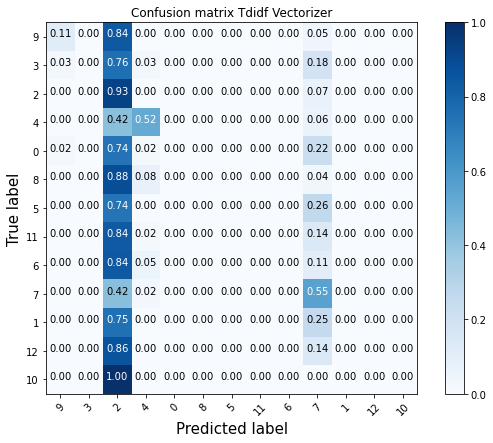

In [546]:
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions_NB)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=True,
                      title='Confusion matrix Tdidf Vectorizer')

In [548]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Among the above models Logistic Regression does better than other models. So LogistricRegression is my final model

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">B. Build classifier Models using other algorithms than base model. [4 Marks]

In [683]:
from sklearn.neighbors import KNeighborsClassifier

In [688]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(blog_df_final['fin_text'])

X_Tfidf = Tfidf_vect.transform(X)

In [689]:
X_Tfidf.shape

(9551, 5000)

In [687]:
y.shape

(9551,)

In [690]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    KNeighborsClassifier()
    
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_Tfidf, y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

Hint: Accuracy, Precision, Recall, ROC-AUC

In [691]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()*100
std_accuracy = cv_df.groupby('model_name').accuracy.std()*100

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
KNeighborsClassifier,22.531538,1.709312
LinearSVC,50.444952,5.730410
LogisticRegression,52.256240,6.669769
MultinomialNB,49.670105,2.573266
RandomForestClassifier,36.215967,2.012134


In [692]:
from sklearn import preprocessing

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">C. Tune Parameters/Hyperparameters of the model/s. [4 Marks]

In [693]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ["l1","l2"]
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_Tfidf,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.5273803085470999


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">D. Clearly print Performance Metrics. [2 Marks]

In [694]:
# predict the labels on validation dataset
pred = logreg_cv.best_estimator_.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Logistic Regression Best accuracy score -> ",accuracy_score(pred, y_test)*100)

Logistic Regression Best accuracy score ->  69.6493982208268


In [702]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores(y_val, predicted):
    print('Accuracy score: ', accuracy_score(y_val, predicted)*100)
    print('F1 score: ', f1_score(y_val, predicted, average='micro')*100)
   # print('Average precision score: ', average_precision_score(y_val, predicted, average='micro'))
    #print('Average recall score: ', recall_score(y_val, predicted, average='micro'))

In [703]:
print_evaluation_scores(y_test, pred)

Accuracy score:  69.6493982208268
F1 score:  69.6493982208268


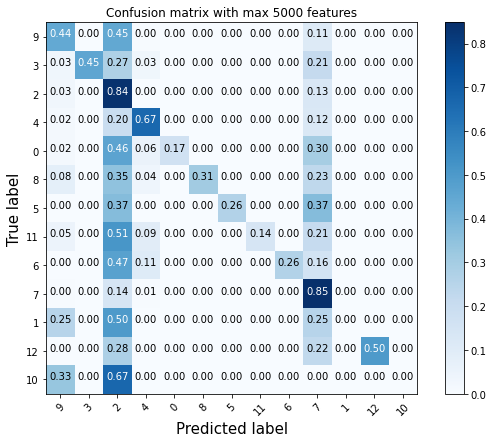

In [696]:
cnf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=True,
                      title='Confusion matrix with max 5000 features')

In [697]:
# Classification report
print("Classification report")
print(classification_report(y_test,pred))

Classification report
              precision    recall  f1-score   support

           0       0.75      0.44      0.56       220
           1       1.00      0.45      0.62        33
           2       0.62      0.84      0.71       634
           3       0.93      0.67      0.78       332
           4       0.90      0.17      0.28        54
           5       0.80      0.31      0.44        26
           6       1.00      0.26      0.42        19
           7       1.00      0.14      0.24        43
           8       1.00      0.26      0.42        19
           9       0.67      0.85      0.75       488
          10       0.00      0.00      0.00         4
          11       1.00      0.50      0.67        36
          12       0.00      0.00      0.00         3

    accuracy                           0.70      1911
   macro avg       0.74      0.38      0.45      1911
weighted avg       0.74      0.70      0.68      1911



Vectorizing the text
tf - Term Frequency
idf - Inverse Document Frequency

We will be using TfidfVectorizer function with the below parameters:

min_df: remove the words which has occurred in less than ‘min_df’ number of files.
Sublinear_tf: if True, then scale the frequency in logarithmic scale.
Stop_words: it removes stop words which are predefined in ‘english’.

In [704]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each Text into a vector
features = tfidf.fit_transform(blog_df_final.fin_text).toarray()
labels = blog_df_final.topic_id
print("Each of the %d blogs is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 9551 blogs is represented by 20281 features (TF-IDF score of unigrams and bigrams)


In [705]:
sorted(topic_to_id.values())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [706]:
sorted(topic_to_id.items())

[('Accounting and Education', 4),
 ('Agriculture, Biotech,Environment', 14),
 ('Architecture,Construction,RealEstate', 13),
 ('Arts and Science', 6),
 ('Automotive,Transportation', 12),
 ('Banking,InvestmentBanking,BusinessServices', 1),
 ('Chemicals,Manufacturing', 15),
 ('Consulting,Marketing,Publishing,Advertising', 11),
 ('Engineering and Telecommunications', 5),
 ('Fashion, religion and Non-Profit', 3),
 ('Government,Law and military', 10),
 ('Internet, communication media and Humar Resources', 7),
 ('Museums-Libraries,Sports-Recreation,Tourism', 8),
 ('Student', 0),
 ('Technology', 9),
 ('indUnk', 2)]

Using **sklearn.feature_selection.chi2** to find the terms that are the most correlated with each of the products:

In [708]:
from sklearn.feature_selection import chi2
import numpy as np
i=0
N = 2 
for topic, topic_id in sorted(topic_to_id.items()):
  if (i<3) :
      features_chi2 = chi2(features, labels == topic_id)
      indices = np.argsort(features_chi2[0])
      feature_names = np.array(tfidf.get_feature_names())[indices]
      unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
      bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
      print("# '{}':".format(topic))
      print("  . Most correlated unigrams: {}".format(' '.join(unigrams[-N:])))
      print("  . Most correlated bigrams: {}".format(' '.join(bigrams[-N:])))
      i=i+1

# 'Accounting and Education':
  . Most correlated unigrams: ekeke aihz
  . Most correlated bigrams: peter sensei aint neat
# 'Agriculture, Biotech,Environment':
  . Most correlated unigrams: handy zzzz
  . Most correlated bigrams: hang day hand say
# 'Architecture,Construction,RealEstate':
  . Most correlated unigrams: handy zzzz
  . Most correlated bigrams: hang day hand say


In [709]:
# Finding the three most correlated terms with each of the text categories
N = 3
i=0
for topic, topic_id in sorted(topic_to_id.items()):
  if (i<40) :
      features_chi2 = chi2(features, labels == topic_id)
      #print(features_chi2)
      #print("NAN check=",np.isnan(features_chi2[0]))
      #print('condition ',(np.isnan(features_chi2[0])).any()==False)
     # print('condition ',np.isnan(features_chi2[0].all())==False)
      if(np.isnan(features_chi2[0])).any()==False:
          indices = np.argsort(features_chi2[0])
          feature_names = np.array(tfidf.get_feature_names())[indices]
          unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
          bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
          print("n==> %s:" %(topic))
          print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
          print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))
      i=i+1
    

n==> Accounting and Education:
  * Most Correlated Unigrams are: kendo, ekeke, aihz
  * Most Correlated Bigrams are: darn bore, peter sensei, aint neat
n==> Arts and Science:
  * Most Correlated Unigrams are: ghetto, node, carlene
  * Most Correlated Bigrams are: civil war, mr johnreed, john reed
n==> Automotive,Transportation:
  * Most Correlated Unigrams are: symphony, vw, brian
  * Most Correlated Bigrams are: think smell, better come, nbsp want
n==> Banking,InvestmentBanking,BusinessServices:
  * Most Correlated Unigrams are: korea, korean, seoul
  * Most Correlated Bigrams are: urllink joongang, cover letter, career portfolio
n==> Consulting,Marketing,Publishing,Advertising:
  * Most Correlated Unigrams are: kurt, karon, ked
  * Most Correlated Bigrams are: kurt michelle, ked work, life group
n==> Engineering and Telecommunications:
  * Most Correlated Unigrams are: lator, comming, jender
  * Most Correlated Bigrams are: gonna die, cause like, daily grind
n==> Fashion, religion an

**Comments**:
    The unigrams and bigrams gave interesting values, example technology has index, http www , Sports and recreation fantasy baseball and
    Government,Law and militay has work suck, life new etc

In [710]:
X_train.shape


(7640,)

In [712]:
X_train.head()

5067    beyond want beyond fear fear terrify many ques...
3926    well vote amien rais siswono morning election ...
9386    hey hey hey bio midterm easy probably b take p...
225     deer eye dart ears perk shuffle sound dead lea...
2806                                    help red put test
Name: fin_text, dtype: object

In [724]:
#tf idf
#tf_idf = TfidfVectorizer()
tf_idf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english',max_features=5000)
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(X_train).toarray()

#applying tf idf to test data
X_test_tf = tf_idf.transform(X_test)

In [726]:
solvers = 'liblinear'
penalty = "l1"
c_values = 1.0
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver=solvers,penalty=penalty,C=c_values)
logreg.fit(X_train_tf,y_train)

pred_lr_tdif=logreg.predict(X_test_tf)


In [729]:
print_evaluation_scores(y_test, pred_lr_tdif)

Accuracy score:  63.05599162742019
F1 score:  63.05599162742019


In [732]:
labels=y_test.unique()

In [733]:
labels

array([ 9,  3,  2,  4,  0,  8,  5, 11,  6,  7,  1, 12, 10], dtype=int64)

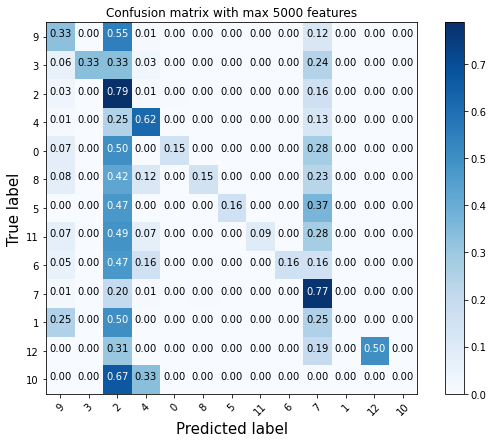

In [734]:
cnf_matrix = confusion_matrix(y_test, pred_lr_tdif)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=True,
                      title='Confusion matrix with max 5000 features')

Hint: Accuracy, Precision, Recall, ROC-AUC

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">5.. Share insights on relative performance comparison [8 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A. Which vectorizer performed better? Probable reason?. 
[2 Marks]

In [ ]:
print("Accuracy with different 2 vectors")

In [742]:
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score with Count vector -> ",accuracy_score(predictions_NB_count, y_test)*100)
print("Accuracy Score with best model hyperparameter tuning and TDfidf vector -> ",accuracy_score(pred, y_test)*100)
print("Accuracy Score Logistic regression and TDfidf vector with ngram(1,2) -> ",accuracy_score(pred_lr_tdif, y_test)*100)


Naive Bayes Accuracy Score with Count vector ->  57.195185766614344
Accuracy Score with best model hyperparameter tuning and TDfidf vector ->  69.6493982208268
Accuracy Score Logistic regression and TDfidf vector with ngram(1,2) ->  63.05599162742019


From the models build above its clear that TF-IDF vectorizer performs better than count vectorizer.
<br>
* Because TD-IDF vectorizer defines importance of a term by taking into consideration the importance of that term in a single document, and scaling it by its importance across all documents
* This mathematically eliminates naturally occurring words in the English language, and selects words that are more descriptive of your text

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">B. Which model outperformed? Probable reason? [2 Marks]

In [735]:
acc

,Mean Accuracy,Standard deviation
model_name,,
KNeighborsClassifier,22.531538,1.709312
LinearSVC,50.444952,5.730410
LogisticRegression,52.256240,6.669769
MultinomialNB,49.670105,2.573266
RandomForestClassifier,36.215967,2.012134


Logistic Regression model performed better in this classification, The reasons are as follows
* Logistic regression is used for binary or multi-class classification, and the target variable always has to be categorical
* As here  are more than two classes of the response variable, it's called multinomial logistic regression
* Logistic regression has good performance in text classifcation because of, its easy to implement, interpret and efficient in training
* It is very fast in classifying unknown data
* It performs well when dataset is linearly seperable

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">
C. Which parameter/hyperparameter significantly helped 
to improve performance?Probable reason?. [2 Marks]

In Logistic Regression model following hyper parameters gave best performance. <br>
(best parameters)  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

**C 1.0** is a "hyperparameter."A high value of C  indicates that training data is more important and reflects the real world data, whereas low value is just the opposite of this.<br>

**L1** Regularization adds an L1 penalty equal to the absolute value of the magnitude of coefficients. In other words, it limits the size of the coefficients. L1 can yield sparse models (i.e. models with few coefficients); Some coefficients can become zero and eliminated. Lasso regression uses this method.<br>

**solver': 'liblinear'**: liblinear supports both regularization. And liblinear works well for small dataset


ngram_rangetuple (min_n, max_n), default=(1, 1) The lower and upper boundary of the range of n-values for different n-grams to be extracted.This gives better performance in the best model

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">D. According to you, which performance metric should be 
given most importance, why?. [2 Marks]

In [755]:
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score with Count vector -> ",accuracy_score(predictions_NB_count, y_test)*100)
print("Accuracy Score with best model hyperparameter tuning and TDfidf vector -> ",accuracy_score(pred, y_test)*100)
print("Accuracy Score Logistic regression and TDfidf vector with ngram(1,2) -> ",accuracy_score(pred_lr_tdif, y_test)*100)

Naive Bayes Accuracy Score with Count vector ->  57.195185766614344
Accuracy Score with best model hyperparameter tuning and TDfidf vector ->  69.6493982208268
Accuracy Score Logistic regression and TDfidf vector with ngram(1,2) ->  63.05599162742019


In [756]:
### Best model classification report

In [757]:
print("Classification report")
print(classification_report(y_test,pred_lr_tdif))

Classification report
              precision    recall  f1-score   support

           0       0.62      0.33      0.43       220
           1       1.00      0.33      0.50        33
           2       0.55      0.79      0.65       634
           3       0.90      0.62      0.73       332
           4       0.80      0.15      0.25        54
           5       0.57      0.15      0.24        26
           6       1.00      0.16      0.27        19
           7       0.80      0.09      0.17        43
           8       1.00      0.16      0.27        19
           9       0.62      0.77      0.69       488
          10       0.00      0.00      0.00         4
          11       1.00      0.50      0.67        36
          12       0.00      0.00      0.00         3

    accuracy                           0.63      1911
   macro avg       0.68      0.31      0.37      1911
weighted avg       0.67      0.63      0.61      1911



 * In the above text classification problem accuracy can be given more importance as classifying right topic is more important.
* In multi-label problems, predictions for an instance is a set of labels, and therefore, the concept of fully correct vs partially correct solution can be considered. In addition, apart from evaluating the quality of the categorization into classes, we could also evaluate if the classes are correctly ranked by relevance.

Hence according to me precision and accuracy are import metrics


















**Conclusion** : In this project, how to model for Text classification for Multiclass problem is learned. To make the system to learn the language the basic idea in NLP is making the text in vector format so systems can interpret it.Learned about preprocessing the text data like removing special characters, stop words, tokenization, lemmetization and different vectors like count vector and tdidf vector.

# Part B - 20 Marks

**.DOMAIN:** Customer support

**• CONTEXT:** Great Learning has a an academic support department which receives numerous support requests every day throughout the year.
Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy
workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper
resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with
the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human
support executive if the request is complex or not in it’s database.

**• DATA DESCRIPTION:** A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.


**• PROJECT OBJECTIVE:** Design a python based interactive semi - rule based chatbot which can do the following:


1. Start chat session with greetings and ask what the user is looking for. [5 Marks]
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus. [10 Marks]
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it. [5 Marks]
Hint: There are a lot of techniques using which one can clean and prepare the data which can be used to train a ML/DL classifier. Hence, it might
require you to experiment, research, self learn and implement the above classifier. There might be many iterations between hand building the
corpus and designing the best fit text classifier. As the quality and quantity of corpus increases the model’s performance i.e. ability to answer
right questions also increases.

## Importing required libraries

In [1]:
import json
import string
import random 
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer 
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
nltk.download("punkt")
nltk.download("wordnet")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Loading the json corpus

In [22]:
import json

with open('GL+Bot.json') as f:
  data = json.load(f)

In [23]:
# initializing lemmatizer to get stem of words
lemmatizer = WordNetLemmatizer()
# Each list to create
words = []
classes = []
doc_X = []
doc_y = []
# Loop through all the intents
# tokenize each pattern and append tokens to words, the patterns and
# the associated tag to their associated list
for intent in data["intents"]:
    for pattern in intent["patterns"]:
        tokens = nltk.word_tokenize(pattern)
        words.extend(tokens)
        doc_X.append(pattern)
        doc_y.append(intent["tag"])
    
    # add the tag to the classes if it's not there already 
    if intent["tag"] not in classes:
        classes.append(intent["tag"])
# lemmatize all the words in the vocab and convert them to lowercase
# if the words don't appear in punctuation
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in string.punctuation]
# sorting the vocab and classes in alphabetical order and taking the # set to ensure no duplicates occur
words = sorted(set(words))
classes = sorted(set(classes))

In [24]:
print(words)

['a', 'able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyone', 'are', 'artificial', 'attention', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'can', 'classification', 'concern', 'contact', 'create', 'cross', 'cya', 'dated', 'day', 'deep', 'did', 'diffult', 'do', 'ensemble', 'epoch', 'explain', 'few', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'have', 'having', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imputer', 'in', 'intelligence', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'material', 'me', 'ml', 'my', 'naive', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'ny', 'of', 'olympus', 'olypus', 'on', 'online', 'operation', 'opertions', 'otimizer', 'out', 'parameter', 'piece', 'please', '

In [25]:
print(classes)

['Bot', 'Exit', 'Feedback', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket', 'Working Hours']


In [26]:
print(doc_X)

['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time', 'thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy', 'olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of problem with olympus', 'olypus is not a good tool', 'lot of problems with olympus', 'how to use olympus', 'teach me olympus', 'i am not able to understand svm', 'explain me how machine learning works', 'i am not able to understand naive bayes', 'i am n

In [27]:
print(doc_y)

['Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'Bot', 'Bot', 'Bot', 'Bot', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Working Hour

In [28]:
# list for training data
training = []
out_empty = [0] * len(classes)
# creating the bag of words model
for idx, doc in enumerate(doc_X):
    bow = []
    text = lemmatizer.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)
    # mark the index of class that the current pattern is associated
    # to
    output_row = list(out_empty)
    output_row[classes.index(doc_y[idx])] = 1
    # add the one hot encoded BoW and associated classes to training 
    training.append([bow, output_row])
# shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)
# split the features and target labels
train_X = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))

In [29]:
# defining some parameters
input_shape = (len(train_X[0]),)
output_shape = len(train_y[0])
epochs = 200
# the deep learning model
model = Sequential()
model.add(Dense(128, input_shape=input_shape, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(output_shape, activation = "softmax"))
adam = tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=["accuracy"])
print(model.summary())
model.fit(x=train_X, y=train_y, epochs=200, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               21888     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 30,794
Trainable params: 30,794
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
5/5 [============================

5/5 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 74/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 75/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 76/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 77/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9925
Epoch 78/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 79/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 80/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 0.9925
Epoch 81/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9925
Epoch 82/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 83/200
5/5 [===============

Epoch 156/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9925
Epoch 157/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 158/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9925
Epoch 159/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9699
Epoch 160/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0752 - accuracy: 0.9850
Epoch 161/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9925
Epoch 162/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 163/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 164/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9925
Epoch 165/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 166/

In [30]:
def clean_text(text): 
  tokens = nltk.word_tokenize(text)
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return tokens

def bag_of_words(text, vocab): 
  tokens = clean_text(text)
  bow = [0] * len(vocab)
  for w in tokens: 
    for idx, word in enumerate(vocab):
      if word == w: 
        bow[idx] = 1
  return np.array(bow)

def pred_class(text, vocab, labels): 
  bow = bag_of_words(text, vocab)
  result = model.predict(np.array([bow]))[0]
  thresh = 0.2
  y_pred = [[idx, res] for idx, res in enumerate(result) if res > thresh]

  y_pred.sort(key=lambda x: x[1], reverse=True)
  return_list = []
  for r in y_pred:
    return_list.append(labels[r[0]])
  return return_list

def get_response(intents_list, intents_json): 
  tag = intents_list[0]
  list_of_intents = intents_json["intents"]
  for i in list_of_intents: 
    if i["tag"] == tag:
      result = random.choice(i["responses"])
      break
  return result

In [31]:
# running the chatbot
flag=True
print("BOT: My name is Jenny. Let's have a conversation! Also, if you want to exit any time, just type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        #message = input("")
        intents = pred_class(user_response, words, classes)
        result = get_response(intents, data)
        print(result)
    else:
        flag=False
        print("BOT: Goodbye! Take care! ")

BOT: My name is Jenny. Let's have a conversation! Also, if you want to exit any time, just type Bye!
Hello
Hello! how can i help you ?
Good to talk to you
I hope I was able to assist you, Good Bye
wait
Hello! how can i help you ?
want more materials
You can write to us support@greatlearning.com
working hours
I am available 24/7. Live assisttance will be available from 9AM-7PM
Thats great
I hope I was able to assist you, Good Bye
one more query
Hello! how can i help you ?
Doubts on AIML
Hello! how can i help you ?
Adaboost
Hello! how can i help you ?
who are you
I am your virtual learning assistant, Jenny
where can i send my feedback
You can write to us support@greatlearning.com
PM is not good
Hello! how can i help you ?
Bad
Tarnsferring the request to your PM
doubts
Hello! how can i help you ?
Sigmoid
Link: Neural Nets wiki
Bye
BOT: Goodbye! Take care! 


In [32]:
# running the chatbot
flag=True
print("BOT: My name is Jenny. Let's have a conversation! Also, if you want to exit any time, just type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        #message = input("")
        intents = pred_class(user_response, words, classes)
        result = get_response(intents, data)
        print(result)
    else:
        flag=False
        print("BOT: Goodbye! Take care! ")

BOT: My name is Jenny. Let's have a conversation! Also, if you want to exit any time, just type Bye!
tell me about SVM
Link: Machine Learning wiki 
Prolem in olympus
Link: Olympus wiki
what is artificial intelligence
Link: Neural Nets wiki
do you think you are smart
Please use respectful words
who are you
I am your virtual learning assistant, Jenny
want more materials
You can write to us support@greatlearning.com
where can i send feedback
You can write to us support@greatlearning.com
you did not help me
Tarnsferring the request to your PM
when will he be available
I am available 24/7. Live assisttance will be available from 9AM-7PM
Thats great
I hope I was able to assist you, Good Bye
Bye
BOT: Goodbye! Take care! 
